In [5]:
import pandas as pd

In [6]:
df_test_x = pd.read_csv("./mnist_test.csv", header=None)
df_test_y = df_test_x.iloc[:,0]
df_test_x.drop(columns=df_test_x.columns[0], axis=1, inplace=True)

In [7]:
df_train_x = pd.read_csv("./mnist_train.csv", header=None)
df_train_y = df_train_x.iloc[:,0]
df_train_x.drop(columns=df_train_x.columns[0], axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
df_test_x = pd.DataFrame(scaler.fit_transform(df_test_x.to_numpy()))
df_train_x = pd.DataFrame(scaler.fit_transform(df_train_x.to_numpy()))

In [10]:
from sklearn.decomposition import TruncatedSVD

In [11]:
# Choosing components based on their explained_variance_ratio_

prop_of_var = {'n_components': [], 'total_varience': []}
total_ex_var = 0
n = 1
while total_ex_var < 90 and n < 100:
    df_train_x_svd = TruncatedSVD(n_components=n)
    df_train_x_svd.fit_transform(df_train_x)
    total_ex_var = sum(df_train_x_svd.explained_variance_ratio_)
    prop_of_var['n_components'].append(n)
    prop_of_var['total_varience'].append(total_ex_var)
    n+=2
print(n-2,total_ex_var)

99 0.9134203183214278


In [12]:
df_train_x_svd = df_train_x_svd.fit_transform(df_train_x)
df_test_x_svd = TruncatedSVD(n_components=n-2)
df_test_x_svd = df_test_x_svd.fit_transform(df_test_x)

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Proportion of the Variance Explained')

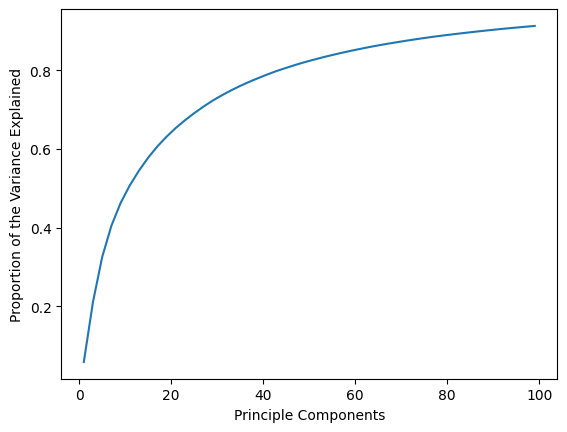

In [14]:
plt.plot(prop_of_var['n_components'], prop_of_var['total_varience']);
plt.xlabel('Principle Components')
plt.ylabel('Proportion of the Variance Explained')

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# Naive Bayes

gnb_svd = GaussianNB()
gnb = GaussianNB()
gnb_model = gnb.fit(df_train_x, df_train_y)
gnb_svd_model = gnb_svd.fit(df_train_x_svd, df_train_y)
gnb_model_pred = gnb_model.predict(df_test_x)
gnb_svd_model_pred = gnb_svd_model.predict(df_test_x_svd)

In [42]:
# Logistic Regression

lr_svd = SGDClassifier(loss='log_loss', learning_rate='optimal')
lr = SGDClassifier(loss='log_loss', learning_rate='optimal')
lr_model =lr.fit(df_train_x, df_train_y)
lr_svd_model = lr_svd.fit(df_train_x_svd, df_train_y)
lr_model_pred = lr_model.predict(df_test_x)
lr_svd_model_pred = lr_svd_model.predict(df_test_x_svd)

In [18]:
from sklearn.model_selection  import train_test_split

In [19]:
x_train_df_svd, x_validation_df_svd, y_train_df_svd, y_validation_df_svd = train_test_split(df_train_x_svd, df_train_y, test_size=.4)
x_train_df, x_validation_df, y_train_df, y_validation_df = train_test_split(df_train_x, df_train_y, test_size=.4)

In [27]:
# Choosing the proper k for knn
def optimize_k(train_x, train_y, val_x, val_y):
    best = {'k': 3, 'score': 0}
    for k in range(3,100,3):
        knn = KNeighborsClassifier(n_neighbors=k)
        model = knn.fit(train_x,train_y)
        pred = model.predict(val_x)
        s = model.score(val_x,val_y)
        if(s > best['score']):
            best['k'] = k
            best['score'] = s
        print(k,s)
    return best

In [28]:
print(optimize_k(x_train_df_svd,y_train_df,x_validation_df_svd,y_validation_df_svd))

3 0.10454166666666667
6 0.09979166666666667
9 0.101875
12 0.09966666666666667
15 0.1015
18 0.10075
21 0.10141666666666667
24 0.10125
27 0.10175
30 0.10191666666666667
33 0.10245833333333333
36 0.103125
39 0.10466666666666667
42 0.10445833333333333
45 0.10370833333333333
48 0.10433333333333333
51 0.103875
54 0.10320833333333333
57 0.10320833333333333
60 0.104
63 0.10483333333333333
66 0.104125
69 0.105
72 0.10579166666666667
75 0.106125
78 0.10616666666666667
81 0.10879166666666666
84 0.10866666666666666
87 0.108
90 0.10895833333333334
93 0.10854166666666666
96 0.107875
99 0.10775
{'k': 90, 'score': 0.10895833333333334}


In [31]:
# K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(x_train_df,y_train_df)

knn_svd = KNeighborsClassifier(n_neighbors=3)
knn_svd_model = knn_svd.fit(x_train_df_svd,y_train_df)

knn_svd_model_pred = knn_svd_model.predict(df_test_x_svd)
knn_model_pred = knn_model.predict(df_test_x)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [41]:
actual = df_test_y

print("Model: Naive Bayes")
accuracy = metrics.accuracy_score(actual, gnb_svd_model_pred)
print(f"SVD Accuracy: {accuracy}")
accuracy = metrics.accuracy_score(actual, gnb_model_pred)
print(f"Regular Accuracy: {accuracy}\n")

print("Model: Logistic Regression")
accuracy = metrics.accuracy_score(actual, lr_svd_model_pred)
print(f"SVD Accuracy: {accuracy}")
accuracy = metrics.accuracy_score(actual, lr_model_pred)
print(f"Regular Accuracy: {accuracy}\n")

print("Model: KNN")
accuracy = metrics.accuracy_score(actual, knn_svd_model_pred)
print(f"SVD Accuracy: {accuracy}")
accuracy = metrics.accuracy_score(actual, knn_model_pred)
print(f"Regular Accuracy: {accuracy}\n")


Model: Naive Bayes
SVD Accuracy: 0.3501
Regular Accuracy: 0.5546

Model: Logistic Regression
SVD Accuracy: 0.1866
Regular Accuracy: 0.9251

Model: KNN
SVD Accuracy: 0.0936
Regular Accuracy: 0.9644

